In [5]:
# DATA PREPROCESSING REGRESSORS
# DATO: Ammoniaca TS
# REGRESSOR: Temepratura TS (TODO 0.05), Vegetazione TS (High, Low)
# REGRESSOR: Altitudine
# REGRESSOR: Area agricola (TODO)
# REGRESSOR: Aree in classi con popolazione (Altro files)

<AxesSubplot:>

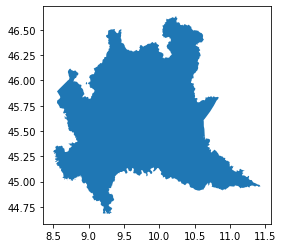

In [6]:
# REGIONE
import geopandas as gpd
from shapely.geometry import Point

from shapely import speedups
speedups.disable()

regione = gpd.read_file('../resources/regione/regione_2015.shp')

regione.to_crs(epsg=4326, inplace=True)
regione.plot()

In [7]:
# AMMONIACA

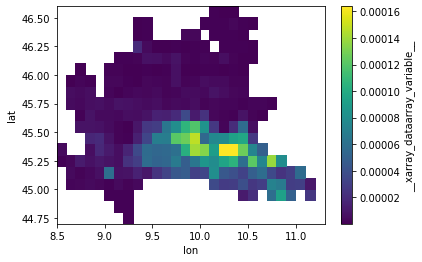

In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds_ammoniaca = xr.load_dataset('../datasets/ammoniaca.nc')

ds_ammoniaca.__xarray_dataarray_variable__.mean(dim="time").plot()

In [9]:
lat_bounds = slice(44.74,46.56)
lon_bounds = slice(8.5, 11.25)

ammoniaca = ds_ammoniaca.__xarray_dataarray_variable__.sel(lat=lat_bounds, lon=lon_bounds)

ammoniaca

<xarray.DataArray '__xarray_dataarray_variable__' (time: 252, lat: 19, lon: 28)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan, 1.40527645e-05,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan, 1.54474892e-05,            nan],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan, 2.01027506e-05,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2020-12-15
  * lat      (lat) float64 44.75 44.85 44.95 45.05 ... 46.25 46.35 46.45 46.55
  * lon      (lon) float64 8.55 8.65 8.75 8.85 8.95 ... 10.95 11.05 11.15 11.25

(array([5.2562e+04, 7.8310e+03, 4.1590e+03, 2.3360e+03, 1.2240e+03,
        6.8000e+02, 5.3200e+02, 2.9600e+02, 1.4200e+02, 4.2000e+01]),
 array([6.90289292e-09, 2.85824023e-05, 5.71579016e-05, 8.57334010e-05,
        1.14308900e-04, 1.42884400e-04, 1.71459899e-04, 2.00035398e-04,
        2.28610898e-04, 2.57186397e-04, 2.85761897e-04]),
 <BarContainer object of 10 artists>)

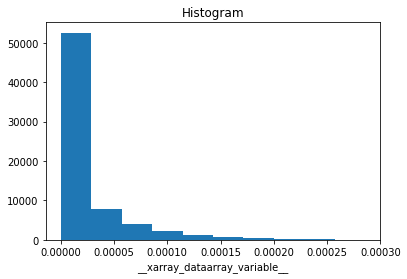

In [31]:
ammoniaca.plot()

In [10]:
# REGRESSOR: Temepratura

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds_temperature = xr.load_dataset('../datasets/temperature.nc') # Copernicus (0.1°x0.1°)

ds_temperature

ds_temperature.dims

Frozen(SortedKeysDict({'longitude': 41, 'latitude': 31, 'time': 248}))

In [12]:
lat_bounds = slice(46.56,44.74) # Invertiti
lon_bounds = slice(8.5, 11.25)

t2m = ds_temperature.t2m.sel(latitude=lat_bounds, longitude=lon_bounds)
lai_hv = ds_temperature.lai_hv.sel(latitude=lat_bounds, longitude=lon_bounds)
lai_lv = ds_temperature.lai_lv.sel(latitude=lat_bounds, longitude=lon_bounds)

t2m = t2m.transpose('time', 'latitude', 'longitude')
t2m.dims

t2m = t2m.sortby('latitude', ascending=True) # Riordina
t2m

<xarray.DataArray 't2m' (time: 248, latitude: 18, longitude: 28)>
array([[[279.2176 , 279.21317, 279.0243 , ..., 280.2719 , 280.45813,
         280.58847],
        [279.39496, 279.39938, 279.24863, ..., 280.30383, 280.54147,
         280.70374],
        [279.58826, 279.6725 , 279.64145, ..., 280.27014, 280.44836,
         280.58316],
        ...,
        [267.97134, 269.5435 , 270.99063, ..., 270.53043, 271.85605,
         273.05933],
        [267.17685, 267.7257 , 268.8288 , ..., 268.835  , 271.29388,
         272.92102],
        [265.27838, 265.75632, 266.31317, ..., 268.702  , 270.98706,
         272.5415 ]],

       [[286.0613 , 286.21558, 286.04   , ..., 284.13004, 284.06885,
         283.95   ],
        [285.50266, 285.65518, 285.6064 , ..., 284.15485, 284.12204,
         284.00677],
        [284.6727 , 284.94226, 285.04956, ..., 284.08038, 283.97928,
         283.8445 ],
...
        [285.20206, 286.1473 , 287.28055, ..., 290.126  , 291.94467,
         293.52835],
        [283.9385 , 284.7339 , 285.59134, ..., 288.17877, 290.5224 ,
         292.77466],
        [283.07925, 283.42862, 283.83298, ..., 287.18478, 289.73764,
         291.99344]],

       [[302.82028, 303.3204 , 303.2211 , ..., 304.02533, 304.2621 ,
         304.30908],
        [302.70944, 303.17764, 303.2796 , ..., 303.86307, 304.06702,
         304.09982],
        [302.7325 , 303.1874 , 303.52524, ..., 303.4144 , 303.4419 ,
         303.4144 ],
        ...,
        [292.02982, 293.1444 , 294.47095, ..., 295.11115, 296.79327,
         298.20935],
        [290.69708, 291.6973 , 292.7578 , ..., 293.32263, 295.6698 ,
         297.93536],
        [289.69595, 290.39114, 291.1094 , ..., 292.67444, 295.33017,
         297.63123]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 8.5 8.6 8.7 8.8 8.9 ... 10.9 11.0 11.1 11.2
  * latitude   (latitude) float32 44.8 44.9 45.0 45.1 ... 46.2 46.3 46.4 46.5
  * time       (time) datetime64[ns] 2000-01-15T12:00:00 ... 2020-08-15T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

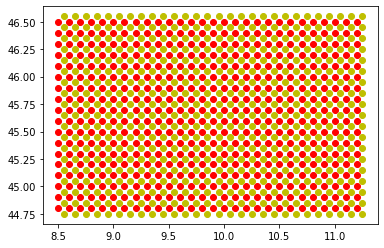

In [13]:
lats = t2m.latitude
lons = t2m.longitude

ammoniaca_lats = ammoniaca.lat
ammoniaca_lons = ammoniaca.lon

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]
ammoniaca_coords = [(lat, lon) for lat in ammoniaca_lats.to_series() for lon in ammoniaca_lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

ammoniaca_lats = [coord[0] for coord in ammoniaca_coords]
ammoniaca_lons = [coord[1] for coord in ammoniaca_coords]

plt.scatter(lons, lats, c='r')
plt.scatter(ammoniaca_lons, ammoniaca_lats, c='y')

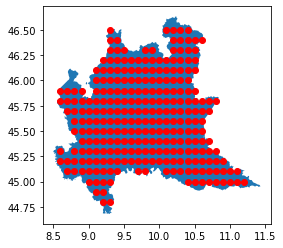

In [14]:
grid = [ (round(lat, 2), round(lon, 2)) for lat, lon in zip(lats, lons) if regione.geometry.contains(Point(lon, lat)).bool()]

lats = [coord[0] for coord in grid]
lons = [coord[1] for coord in grid]

regione.plot()
plt.scatter(lons, lats, c='r')

plt.show()

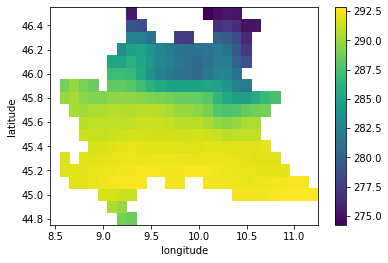

In [15]:
t2m_lats = [round(lat, 2) for lat in t2m.latitude.to_series().tolist()]
t2m_lons = [round(lon, 2) for lon in t2m.longitude.to_series().tolist()]

data = np.zeros((len(t2m_lats), len(t2m_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(t2m_lats):
    for lon_idx, lon in enumerate(t2m_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(t2m[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_t2m = xr.DataArray(data, coords=[t2m_lats, t2m_lons], dims=['latitude', 'longitude'])
mean_t2m.plot()

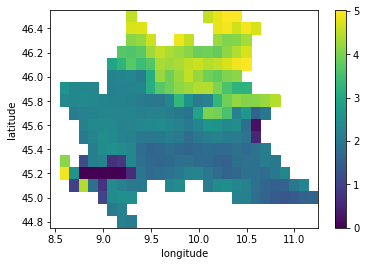

In [16]:
lai_hv_lats = [round(lat, 2) for lat in lai_hv.latitude.to_series().tolist()]
lai_hv_lons = [round(lon, 2) for lon in lai_hv.longitude.to_series().tolist()]

data = np.zeros((len(lai_hv_lats), len(lai_hv_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(lai_hv_lats):
    for lon_idx, lon in enumerate(lai_hv_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(lai_hv[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_lai_hv = xr.DataArray(data, coords=[lai_hv_lats, lai_hv_lons], dims=['latitude', 'longitude'])
mean_lai_hv.plot()

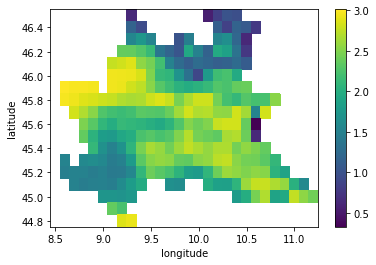

In [17]:
lai_lv_lats = [round(lat, 2) for lat in lai_lv.latitude.to_series().tolist()]
lai_lv_lons = [round(lon, 2) for lon in lai_lv.longitude.to_series().tolist()]

data = np.zeros((len(lai_lv_lats), len(lai_lv_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(lai_lv_lats):
    for lon_idx, lon in enumerate(lai_lv_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(lai_lv[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_lai_lv = xr.DataArray(data, coords=[lai_lv_lats, lai_lv_lons], dims=['latitude', 'longitude'])
mean_lai_lv.plot()

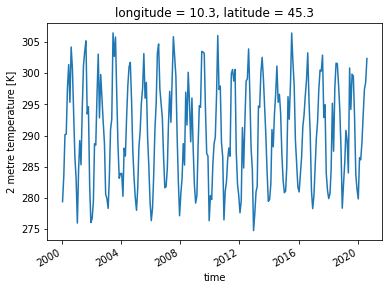

In [18]:
t2m_ts = t2m[:,5,18]

t2m_ts.plot()

In [19]:
t2m

<xarray.DataArray 't2m' (time: 248, latitude: 18, longitude: 28)>
array([[[279.2176 , 279.21317, 279.0243 , ..., 280.2719 , 280.45813,
         280.58847],
        [279.39496, 279.39938, 279.24863, ..., 280.30383, 280.54147,
         280.70374],
        [279.58826, 279.6725 , 279.64145, ..., 280.27014, 280.44836,
         280.58316],
        ...,
        [267.97134, 269.5435 , 270.99063, ..., 270.53043, 271.85605,
         273.05933],
        [267.17685, 267.7257 , 268.8288 , ..., 268.835  , 271.29388,
         272.92102],
        [265.27838, 265.75632, 266.31317, ..., 268.702  , 270.98706,
         272.5415 ]],

       [[286.0613 , 286.21558, 286.04   , ..., 284.13004, 284.06885,
         283.95   ],
        [285.50266, 285.65518, 285.6064 , ..., 284.15485, 284.12204,
         284.00677],
        [284.6727 , 284.94226, 285.04956, ..., 284.08038, 283.97928,
         283.8445 ],
...
        [285.20206, 286.1473 , 287.28055, ..., 290.126  , 291.94467,
         293.52835],
        [283.9385 , 284.7339 , 285.59134, ..., 288.17877, 290.5224 ,
         292.77466],
        [283.07925, 283.42862, 283.83298, ..., 287.18478, 289.73764,
         291.99344]],

       [[302.82028, 303.3204 , 303.2211 , ..., 304.02533, 304.2621 ,
         304.30908],
        [302.70944, 303.17764, 303.2796 , ..., 303.86307, 304.06702,
         304.09982],
        [302.7325 , 303.1874 , 303.52524, ..., 303.4144 , 303.4419 ,
         303.4144 ],
        ...,
        [292.02982, 293.1444 , 294.47095, ..., 295.11115, 296.79327,
         298.20935],
        [290.69708, 291.6973 , 292.7578 , ..., 293.32263, 295.6698 ,
         297.93536],
        [289.69595, 290.39114, 291.1094 , ..., 292.67444, 295.33017,
         297.63123]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 8.5 8.6 8.7 8.8 8.9 ... 10.9 11.0 11.1 11.2
  * latitude   (latitude) float32 44.8 44.9 45.0 45.1 ... 46.2 46.3 46.4 46.5
  * time       (time) datetime64[ns] 2000-01-15T12:00:00 ... 2020-08-15T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

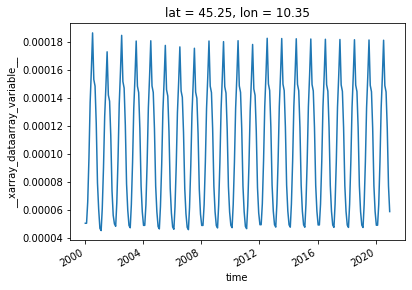

In [20]:
ammoniaca_ts = ammoniaca[:,5,18]

ammoniaca_ts.plot()

In [21]:
import pandas as pd

s1 = pd.Series(ammoniaca_ts.values.tolist())
s2 = pd.Series(t2m_ts.values.tolist())

s1.corr(s2, method='pearson')

0.8960183376247095

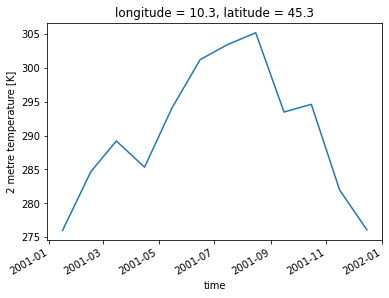

In [18]:
t2m[12:24,5,18].plot()

In [1]:
from workbench import adjust_t2m_grid

t2m_adjusted = adjust_var_grid("../datasets/ammoniaca.nc", "../datasets/temperature.nc", "t2m")

t2m_adjusted

Adjusting time: 0
Adjusting time: 1
Adjusting time: 2
Adjusting time: 3
Adjusting time: 4
Adjusting time: 5
Adjusting time: 6
Adjusting time: 7
Adjusting time: 8
Adjusting time: 9
Adjusting time: 10
Adjusting time: 11
Adjusting time: 12
Adjusting time: 13
Adjusting time: 14
Adjusting time: 15
Adjusting time: 16
Adjusting time: 17
Adjusting time: 18
Adjusting time: 19
Adjusting time: 20
Adjusting time: 21
Adjusting time: 22
Adjusting time: 23
Adjusting time: 24
Adjusting time: 25
Adjusting time: 26
Adjusting time: 27
Adjusting time: 28
Adjusting time: 29
Adjusting time: 30
Adjusting time: 31
Adjusting time: 32
Adjusting time: 33
Adjusting time: 34
Adjusting time: 35
Adjusting time: 36
Adjusting time: 37
Adjusting time: 38
Adjusting time: 39
Adjusting time: 40
Adjusting time: 41
Adjusting time: 42
Adjusting time: 43
Adjusting time: 44
Adjusting time: 45
Adjusting time: 46
Adjusting time: 47
Adjusting time: 48
Adjusting time: 49
Adjusting time: 50
Adjusting time: 51
Adjusting time: 52
Adj

<xarray.DataArray (time: 248, lat: 19, lon: 28)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan, 279.11672974, 279.01501465, ..., 280.43041992,
         280.55587769,          nan],
        [         nan, 279.3678894 , 279.28674316, ..., 280.30206299,
         280.42840576,          nan],
        ...,
        [         nan, 270.03894043, 271.13070679, ..., 269.98797607,
         271.46478271,          nan],
        [         nan, 267.6383667 , 268.62750244, ..., 269.67449951,
         271.20831299,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan, 285.4703064 , 285.38739014, ..., 284.28009033,
         284.1628418 ,          nan],
        [         nan, 285.4559021 , 285.46453857, ..., 284.12823486,
         284.00125122,          nan],
...
        [         nan, 286.4543457 , 287.24594116, ..., 289.29296875,
         291.2277832 ,          nan],
        [         nan, 284.84872437, 285.47607422, ..., 288.85379028,
         290.70812988,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan, 302.53143311, 302.58175659, ..., 303.99542236,
         304.11203003,          nan],
        [         nan, 303.07479858, 303.22265625, ..., 303.76443481,
         303.790802  ,          nan],
        ...,
        [         nan, 293.49420166, 294.4576416 , ..., 294.2951355 ,
         296.10162354,          nan],
        [         nan, 291.82650757, 292.67401123, ..., 294.12756348,
         295.90655518,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15T12:00:00 ... 2020-08-15T12:00:00
  * lat      (lat) float64 44.75 44.85 44.95 45.05 ... 46.25 46.35 46.45 46.55
  * lon      (lon) float64 8.55 8.65 8.75 8.85 8.95 ... 10.95 11.05 11.15 11.25

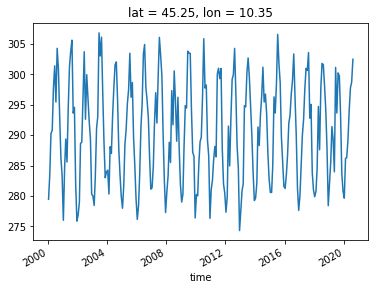

In [2]:
t2m_adjusted[:,5,18].plot()

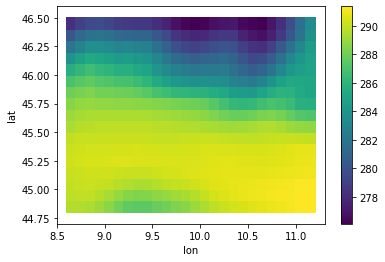

In [24]:
t2m_adjusted.mean(dim="time").plot()

In [ ]:
# TODO Aggiustare anche la grid della vegetazione

In [233]:
# REGRESSOR: Altitudine

In [234]:
ds_elevation = xr.load_dataset('..\\datasets\\elevation.nc') # E-OBS (0.1°x0.1°)

ds_elevation

<xarray.Dataset>
Dimensions:    (latitude: 465, longitude: 705)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
Data variables:
    elevation  (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    References:     http://surfobs.climate.copernicus.eu//dataaccess/access_e...
    E-OBS_version:  21.0e
    Conventions:    CF-1.4

In [235]:
lat_bounds = slice(44.74,46.56)
lon_bounds = slice(8.5, 11.25)

elevation = ds_elevation.elevation.sel(latitude=lat_bounds, longitude=lon_bounds)

elevation

<xarray.DataArray 'elevation' (latitude: 19, longitude: 28)>
array([[ 145.39583  ,  148.05556  ,  188.47917  ,  230.55556  ,
         385.3611   ,  519.9097   ,  878.50696  ,  911.9375   ,
         660.13196  ,  828.75     ,  690.875    ,  757.80554  ,
         598.2986   ,  502.75696  ,  410.90973  ,  265.4861   ,
         121.69444  ,  104.36806  ,   77.09028  ,   53.11111  ,
          30.090279 ,   25.416666 ,   23.020834 ,   17.319445 ,
          15.444445 ,   11.180555 ,    8.715278 ,    6.2430553],
       [  98.19444  ,   94.72222  ,  116.43056  ,  153.88889  ,
         247.15277  ,  355.14584  ,  499.1111   ,  658.3958   ,
         668.9861   ,  470.38196  ,  392.2639   ,  339.90277  ,
         272.34723  ,  202.26389  ,  150.93056  ,   93.798615 ,
          56.354168 ,   36.65972  ,   28.180555 ,   22.625    ,
          16.222221 ,   12.284722 ,   13.111111 ,   11.277778 ,
          11.069445 ,    8.034722 ,    6.       ,    5.9652777],
       [ 108.423615 ,  111.40972  ,   71.9375   ,   82.263885 ,
         104.25694  ,  206.75694  ,  284.46527  ,  357.93054  ,
         352.38196  ,  245.79861  ,  170.63194  ,  117.263885 ,
          89.99306  ,   66.5625   ,   47.854168 ,   31.972221 ,
          26.083334 ,   23.868055 ,   21.743055 ,   16.555555 ,
          12.875    ,   11.       ,   11.       ,   11.       ,
...
        1468.5486   , 1770.4166   , 1938.3611   , 2163.9097   ,
        2442.4932   , 2638.8403   , 2835.       , 1830.2153   ,
        2380.2432   , 1954.8472   , 1814.3541   , 2529.6318   ,
        2730.6182   , 2104.4514   , 1895.75     , 1481.5      ,
        1340.0764   ,  684.56946  , 1295.0209   ,  454.8125   ],
       [2103.014    , 1910.5555   , 1837.4028   , 1438.3125   ,
        1317.9861   , 2232.5903   , 2103.6042   , 2249.2568   ,
        2012.0209   , 2282.2708   , 2499.5068   , 2280.0278   ,
        2278.6528   , 2406.2986   , 2484.0278   , 2484.514    ,
        2536.5693   , 2259.1943   , 1800.5625   , 2281.9514   ,
        2775.4167   , 2815.7014   , 2526.2014   , 2083.4514   ,
        1823.6041   , 1231.625    , 1249.3889   ,  623.19446  ],
       [2096.014    , 2000.7986   , 2181.764    , 2122.6318   ,
        1787.257    , 2523.2083   , 2229.139    , 2205.9583   ,
        2108.7014   , 2041.5764   , 2176.6182   , 2154.514    ,
        2564.639    , 2224.7568   , 2339.875    , 2535.764    ,
        2240.7568   , 2342.8193   , 2349.75     , 2481.3333   ,
        2188.2153   , 2594.389    , 2159.5486   , 2169.0557   ,
        1937.882    , 1544.6597   , 1007.5278   ,  809.49304  ]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 8.55 8.65 8.75 8.85 ... 11.05 11.15 11.25
  * latitude   (latitude) float64 44.75 44.85 44.95 45.05 ... 46.35 46.45 46.55
Attributes:
    units:      metres
    long_name:  Elevation

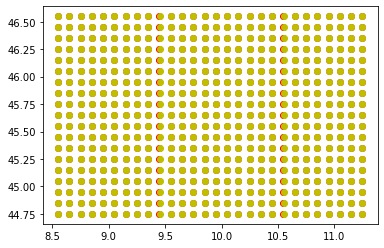

In [236]:
lats = elevation.latitude
lons = elevation.longitude

ammoniaca_lats = ammoniaca.lat
ammoniaca_lons = ammoniaca.lon

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]
ammoniaca_coords = [(lat, lon) for lat in ammoniaca_lats.to_series() for lon in ammoniaca_lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

ammoniaca_lats = [coord[0] for coord in ammoniaca_coords]
ammoniaca_lons = [coord[1] for coord in ammoniaca_coords]

plt.scatter(lons, lats, c='r')
plt.scatter(ammoniaca_lons, ammoniaca_lats, c='y')

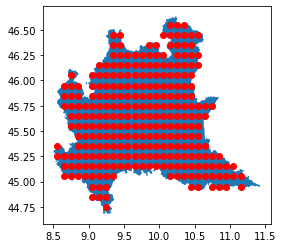

In [237]:
grid = [ (round(lat, 2), round(lon, 2)) for lat, lon in zip(lats, lons) if regione.geometry.contains(Point(lon, lat)).bool()]

lats = [coord[0] for coord in grid]
lons = [coord[1] for coord in grid]

regione.plot()
plt.scatter(lons, lats, c='r')

plt.show()

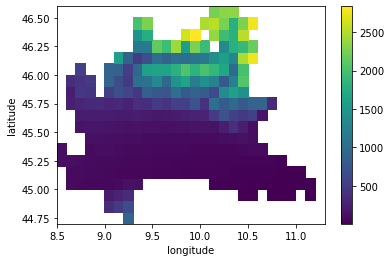

In [238]:
elevation_lats = [round(lat, 2) for lat in elevation.latitude.to_series().tolist()]
elevation_lons = [round(lon, 2) for lon in elevation.longitude.to_series().tolist()]

data = np.zeros((len(elevation_lats), len(elevation_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(elevation_lats):
    for lon_idx, lon in enumerate(elevation_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = elevation[lat_idx, lon_idx]
            
mean_elevation = xr.DataArray(data, coords=[elevation_lats, elevation_lons], dims=['latitude', 'longitude'])
mean_elevation.plot()

In [239]:
# REGRESSOR: Area agricola (TODO)

<AxesSubplot:>

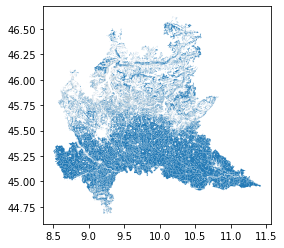

In [240]:
import geopandas as gpd

shp_area_agricola = gpd.read_file('../resources/area_agricola/area_agricola.shp') # Regione Lombardia (shp)

shp_area_agricola.to_crs(epsg=4326, inplace=True)
shp_area_agricola.plot()

In [242]:
shp_area_agricola

,WIZ_U32WG_,ARTICOLO,ISTAT,NOME,SHAPE_AREA,SHAPE_LEN,geometry
0,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,101881.519006,1862.551898,"POLYGON ((8.81300 45.59631, 8.81337 45.59629, ..."
1,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,167998.890282,2528.378404,"POLYGON ((8.86461 45.59897, 8.86543 45.59757, ..."
2,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,2034.709113,195.049164,"POLYGON ((8.87126 45.59848, 8.87090 45.59838, ..."
3,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,866.924122,198.920701,"POLYGON ((8.87163 45.59851, 8.87160 45.59850, ..."
4,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,5017.668598,423.272446,"POLYGON ((8.80845 45.59900, 8.80847 45.59833, ..."
...,...,...,...,...,...,...,...
61633,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,4022.035409,396.439808,"POLYGON ((9.36742 46.11273, 9.36752 46.11255, ..."
61634,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,19835.572116,1004.305746,"POLYGON ((9.31865 46.11253, 9.31898 46.11247, ..."
61635,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,1205.258657,145.396328,"POLYGON ((9.31746 46.11307, 9.31740 46.11274, ..."
61636,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,2575.256482,317.882663,"POLYGON ((9.36905 46.11227, 9.36880 46.11199, ..."


In [243]:
shp_area_agricola.shape

(61638, 7)